In [1]:
# =========================================
# Import required libraries
# =========================================

import pandas as pd
import numpy as np

In [2]:
# =========================================
# Load cleaned and merged datasets (from data_cleaning)
# =========================================

processed_data_path = "../data/processed"

df_2024_simple = pd.read_csv(f"{processed_data_path}/municipal_data_2024.csv")
df_2024_detailed = pd.read_csv(f"{processed_data_path}/municipal_data_2024_detailed.csv")

In [3]:
# =========================================
# Derived columns for demographic analysis
# =========================================

# Population balance: birth minus deaths per 1000 inhabitants
df_2024_simple["Population_balance"] = df_2024_simple["Births_per_1000"] - df_2024_simple["Mortality_per_1000"]

# Depopulation risk: municipalities at demographic risk
# Criteria: Mortality > 15 per 1000 AND Birth rate < 7 per 1000
df_2024_simple["Depopulation_risk"] = (
    (df_2024_simple['Mortality_per_1000'] > 15) &
    (df_2024_simple['Births_per_1000'] < 7)
)

# Preview derived columns
display(df_2024_simple[["Municipality", "Population_balance", "Depopulation_risk"]].head())

,Municipality,Population_balance,Depopulation_risk
0,Abrantes,-9.5,False
1,Agueda,-4.1,False
2,Aguiar Da Beira,-18.4,True
3,Alandroal,-15.3,True
4,Albergaria-A-Velha,-3.4,False


In [4]:
# =========================================
# Basic descriptive statistics 
# =========================================

# Compute descriptive statistics for numeric columns
df_stats = df_2024_simple.describe().T 

# Display results
display(df_stats)

# For the categorical variable (Risco Demográfico)
print("Depopulation risk counts:")
display(df_2024_simple["Depopulation_risk"].value_counts())

,count,mean,std,min,25%,50%,75%,max
Year,308.0,2024.000000,0.000000,2024.0,2024.000,2024.00,2024.000,2024.0
Population,308.0,34901.412338,59091.862334,437.0,6339.500,14262.50,35945.500,575739.0
Mortality_per_1000,308.0,14.215909,4.618668,7.1,10.900,13.40,16.525,34.9
Infant_mortality_per_1000,308.0,3.561364,9.864223,0.0,0.000,0.00,2.600,87.0
Births_per_1000,308.0,6.588312,1.763434,2.2,5.475,6.50,7.700,11.8
Unemployed_total,278.0,1104.651079,1958.054499,33.0,182.000,431.50,1147.000,18662.0
Average_income,308.0,1213.355519,196.023141,952.9,1094.600,1171.45,1276.750,2479.1
Pharmacies_total,308.0,10.139610,17.864218,0.0,3.000,5.00,11.000,245.0
Total_crimes,308.0,1069.730519,2340.860608,3.0,173.750,357.00,1098.750,30853.0
Marriages_per_1000,307.0,3.554723,2.940689,0.2,2.300,3.10,4.000,33.9


Depopulation risk counts:


Depopulation_risk
False    223
True      85
Name: count, dtype: int64

In [5]:
# =========================================
# Top / Bottom Municipalities (Year 2024) 
# =========================================

# Function that returns the top and bottom n municipalities for a given variable.

def top_bottom(df, col, n=5):
    return pd.concat([
        df.nlargest(n, col).assign(Extreme="Top"),
        df.nsmallest(n, col).assign(Extreme="Bottom")   
    ])[["Municipality", col, "Extreme"]]

# List of columns to analyze and their display names
columns = [
    ("Population", "Population"),
    ("Total_crimes", "Number of Crimes"),
    ("Average_income", "Salary"),
    ("Mortality_per_1000", "Mortality Rate"),
    ("Infant_mortality_per_1000", "Infant Mortality Rate"),
    ("Births_per_1000", "Birth Rate"),
    ("Unemployed_total", "Number of Unemployed"),
    ("Marriages_per_1000", "Marriages per 1000"),
    ("Divorces_per_1000", "Divorces per 1000"),
    ("Pharmacies_total", "Number of Pharmacies"),
    ("Population_balance", "Population balance")
]

# Loop over columns
for col, display_name in columns:
    print(f"Top and Bottom 5 Municipalities by {display_name}")
    display(top_bottom(df_2024_simple, col))
    print("\n") 

Top and Bottom 5 Municipalities by Population


,Municipality,Population,Extreme
124,Lisboa,575739.0,Top
255,Sintra,400947.0,Top
294,Vila Nova De Gaia,312984.0,Top
209,Porto,252687.0,Top
65,Cascais,222339.0,Top
82,Corvo,437.0,Bottom
42,Barrancos,1415.0,Bottom
120,Lajes Das Flores,1456.0,Bottom
230,Santa Cruz Das Flores,2114.0,Bottom
23,Alvito,2303.0,Bottom




Top and Bottom 5 Municipalities by Number of Crimes


,Municipality,Total_crimes,Extreme
124,Lisboa,30853.0,Top
209,Porto,15310.0,Top
255,Sintra,11383.0,Top
294,Vila Nova De Gaia,8217.0,Top
16,Almada,7439.0,Top
82,Corvo,3.0,Bottom
120,Lajes Das Flores,21.0,Bottom
195,Penedono,45.0,Bottom
121,Lajes Do Pico,51.0,Bottom
140,Marvao,62.0,Bottom




Top and Bottom 5 Municipalities by Salary


,Municipality,Average_income,Extreme
72,Castro Verde,2479.1,Top
9,Alcochete,2338.9,Top
254,Sines,2180.8,Top
286,Vila Do Porto,2142.2,Top
175,Oeiras,2104.8,Top
195,Penedono,952.9,Bottom
140,Marvao,972.4,Bottom
156,Mondim De Basto,976.1,Bottom
304,Vinhais,998.2,Bottom
243,Sardoal,998.9,Bottom




Top and Bottom 5 Municipalities by Mortality Rate


,Municipality,Mortality_per_1000,Extreme
106,Gaviao,34.9,Top
170,Nisa,32.2,Top
102,Freixo De Espada A Cinta,30.7,Top
266,Torre De Moncorvo,27.5,Top
84,Crato,26.7,Top
306,Vizela,7.1,Bottom
51,Braga,7.3,Bottom
134,Mafra,7.3,Bottom
228,Santa Cruz,7.4,Bottom
188,Paredes,7.5,Bottom




Top and Bottom 5 Municipalities by Infant Mortality Rate


,Municipality,Infant_mortality_per_1000,Extreme
101,Fornos De Algodres,87.0,Top
229,Santa Cruz Da Graciosa,64.5,Top
102,Freixo De Espada A Cinta,55.6,Top
32,Armamar,47.6,Top
23,Alvito,45.5,Top
0,Abrantes,0.0,Bottom
1,Agueda,0.0,Bottom
2,Aguiar Da Beira,0.0,Bottom
3,Alandroal,0.0,Bottom
6,Alcacer Do Sal,0.0,Bottom




Top and Bottom 5 Municipalities by Birth Rate


,Municipality,Births_per_1000,Extreme
24,Amadora,11.8,Top
174,Odivelas,11.7,Top
87,Entroncamento,11.3,Top
126,Loures,11.1,Top
255,Sintra,11.1,Top
62,Carrazeda De Ansiaes,2.2,Bottom
82,Corvo,2.3,Bottom
199,Pinhel,2.3,Bottom
10,Alcoutim,2.5,Bottom
12,Alfandega Da Fe,2.6,Bottom




Top and Bottom 5 Municipalities by Number of Unemployed


,Municipality,Unemployed_total,Extreme
124,Lisboa,18662.0,Top
255,Sintra,11136.0,Top
209,Porto,11046.0,Top
294,Vila Nova De Gaia,10991.0,Top
113,Guimaraes,6602.0,Top
10,Alcoutim,33.0,Bottom
140,Marvao,51.0,Bottom
143,Meda,51.0,Bottom
69,Castelo De Vide,52.0,Bottom
137,Manteigas,52.0,Bottom




Top and Bottom 5 Municipalities by Marriages per 1000


,Municipality,Marriages_per_1000,Extreme
211,Porto Moniz,33.9,Top
237,Sao Bras De Alportel,23.9,Top
155,Monchique,22.1,Top
108,Golega,17.0,Top
88,Espinho,10.8,Top
75,Chamusca,0.2,Bottom
194,Penamacor,0.2,Bottom
158,Montalegre,0.3,Bottom
199,Pinhel,0.6,Bottom
300,Vila Velha De Rodao,0.6,Bottom




Top and Bottom 5 Municipalities by Divorces per 1000


,Municipality,Divorces_per_1000,Extreme
195,Penedono,3.9,Top
133,Madalena,3.4,Top
211,Porto Moniz,3.2,Top
201,Ponta Delgada,3.0,Top
120,Lajes Das Flores,2.8,Top
21,Alter Do Chao,0.0,Bottom
38,Avis,0.0,Bottom
82,Corvo,0.0,Bottom
106,Gaviao,0.0,Bottom
137,Manteigas,0.0,Bottom




Top and Bottom 5 Municipalities by Number of Pharmacies


,Municipality,Pharmacies_total,Extreme
124,Lisboa,245.0,Top
209,Porto,105.0,Top
255,Sintra,69.0,Top
294,Vila Nova De Gaia,66.0,Top
126,Loures,54.0,Top
120,Lajes Das Flores,0.0,Bottom
42,Barrancos,1.0,Bottom
66,Castanheira De Pera,1.0,Bottom
82,Corvo,1.0,Bottom
102,Freixo De Espada A Cinta,1.0,Bottom




Top and Bottom 5 Municipalities by Population balance


,Municipality,Population_balance,Extreme
174,Odivelas,2.8,Top
255,Sintra,2.8,Top
24,Amadora,2.4,Top
5,Albufeira,2.2,Top
246,Seixal,1.5,Top
106,Gaviao,-31.0,Bottom
170,Nisa,-26.9,Bottom
102,Freixo De Espada A Cinta,-24.9,Bottom
266,Torre De Moncorvo,-24.4,Bottom
17,Almeida,-22.1,Bottom


In [6]:
# =========================================
# Normalized indicators (rates)
# =========================================

# Some of the above rankings are strongly influenced by population size.
# Normalized rates allow robust comparisons between municipalities.


# Function to add a normalized rate column 
def add_rate(df, numerator, denominator, multiplier, new_col):
    df[new_col] = df[numerator] / df[denominator] * multiplier

# Create normalized indicators 
add_rate(df_2024_simple, "Total_crimes", "Population", 1000, "Crimes_per_1000")
add_rate(df_2024_simple, "Unemployed_total", "Population", 100, "Unemployment_rate")
add_rate(df_2024_simple, "Pharmacies_total", "Population", 10000, "Pharmacies_per_10000")

# List of columns to analyze and their display names
rate_columns = [
    ("Crimes_per_1000", "Crimes per 1,000 inhabitants"),
    ("Unemployment_rate", "Unemployment Rate (%)"),
    ("Pharmacies_per_10000", "Pharmacies per 10,000 inhabitants")
]

# Loop over columns
for col, display_name in rate_columns:
    print(f"Top and Bottom 5 Municipalities by {display_name}")
    display(top_bottom(df_2024_simple, col))
    print("\n") 

Top and Bottom 5 Municipalities by Crimes per 1,000 inhabitants


,Municipality,Crimes_per_1000,Extreme
5,Albufeira,78.246973,Top
38,Avis,74.487896,Top
165,Mourao,64.555921,Top
125,Loule,61.374795,Top
209,Porto,60.588792,Top
82,Corvo,6.864989,Bottom
121,Lajes Do Pico,11.596180,Bottom
79,Condeixa-A-Nova,11.799575,Bottom
202,Ponta Do Sol,12.780269,Bottom
57,Calheta [R.A.M.],12.920805,Bottom




Top and Bottom 5 Municipalities by Unemployment Rate (%)


,Municipality,Unemployment_rate,Extreme
173,Odemira,7.196008,Top
165,Mourao,7.195724,Top
164,Moura,6.706174,Top
152,Moimenta Da Beira,6.567103,Top
166,Murca,6.349206,Top
269,Trancoso,1.083075,Bottom
143,Meda,1.110144,Bottom
163,Mortagua,1.164323,Bottom
176,Oleiros,1.241857,Bottom
199,Pinhel,1.304848,Bottom




Top and Bottom 5 Municipalities by Pharmacies per 10,000 inhabitants


,Municipality,Pharmacies_per_10000,Extreme
82,Corvo,22.883295,Top
84,Crato,15.389351,Top
38,Avis,13.301410,Top
157,Monforte,13.258204,Top
21,Alter Do Chao,12.414649,Top
120,Lajes Das Flores,0.000000,Bottom
36,Arruda Dos Vinhos,1.269680,Bottom
250,Sesimbra,1.414027,Bottom
228,Santa Cruz,1.561942,Bottom
306,Vizela,1.620220,Bottom


In [7]:
# =========================================
# Salary quartiles analysis
# =========================================

# Create salary quartile groups
df_2024_simple["Salary_quartile"] = pd.qcut(
    df_2024_simple["Average_income"],
    q=4,  # 4 quartiles
    labels=["Q1 (lowest)", "Q2", "Q3", "Q4 (highest)"]
)

# Descriptive statistics by salary quartile
quartile_stats = (
    df_2024_simple
    .groupby("Salary_quartile")
    .agg({
        "Population": "mean",
        "Mortality_per_1000": "mean",
        "Infant_mortality_per_1000": "mean",
        "Births_per_1000": "mean",
        "Marriages_per_1000": "mean",
        "Divorces_per_1000": "mean",
        "Crimes_per_1000": "mean",
        "Unemployment_rate": "mean",
        "Pharmacies_per_10000": "mean"
    })
    .round(2)
)

quartile_stats

C:\Users\Diogo Ribeiro\AppData\Local\Temp\ipykernel_4440\1259471748.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Salary_quartile")


,Population,Mortality_per_1000,Infant_mortality_per_1000,Births_per_1000,Marriages_per_1000,Divorces_per_1000,Crimes_per_1000,Unemployment_rate,Pharmacies_per_10000
Salary_quartile,,,,,,,,,
Q1 (lowest),9773.05,16.85,5.13,5.29,3.21,1.37,26.22,3.27,4.56
Q2,17656.29,14.65,1.99,6.40,3.90,1.48,29.39,3.03,4.66
Q3,33527.48,13.88,4.37,7.06,3.63,1.53,31.39,2.73,4.11
Q4 (highest),78648.83,11.49,2.76,7.60,3.48,1.66,30.50,2.74,3.36


In [8]:
# =========================================
# Testing differences across salary quartiles (ANOVA)
# =========================================

from scipy import stats

variables_to_test = [
    "Mortality_per_1000",
    "Infant_mortality_per_1000",
    "Births_per_1000",
    "Crimes_per_1000",
    "Unemployment_rate",
    "Pharmacies_per_10000",
    "Marriages_per_1000",
    "Divorces_per_1000"
]

anova_results = {}

for var in variables_to_test:
    groups = [
        df_2024_simple[df_2024_simple["Salary_quartile"] == q][var].dropna()
        for q in ["Q1 (lowest)", "Q2", "Q3", "Q4 (highest)"]
    ]

    # One-way ANOVA
    f_stat, p_value = stats.f_oneway(*groups)

    anova_results[var] = {
        "F-statistic": round(f_stat, 2),
        "p-value": round(p_value, 4)
    }

# Convert results to a DataFrame for easy viewing
anova_df = pd.DataFrame(anova_results).T
anova_df

,F-statistic,p-value
Mortality_per_1000,21.11,0.0000
Infant_mortality_per_1000,1.65,0.1784
Births_per_1000,31.92,0.0000
Crimes_per_1000,3.61,0.0137
Unemployment_rate,3.68,0.0126
Pharmacies_per_10000,4.05,0.0076
Marriages_per_1000,0.75,0.5259
Divorces_per_1000,4.09,0.0072


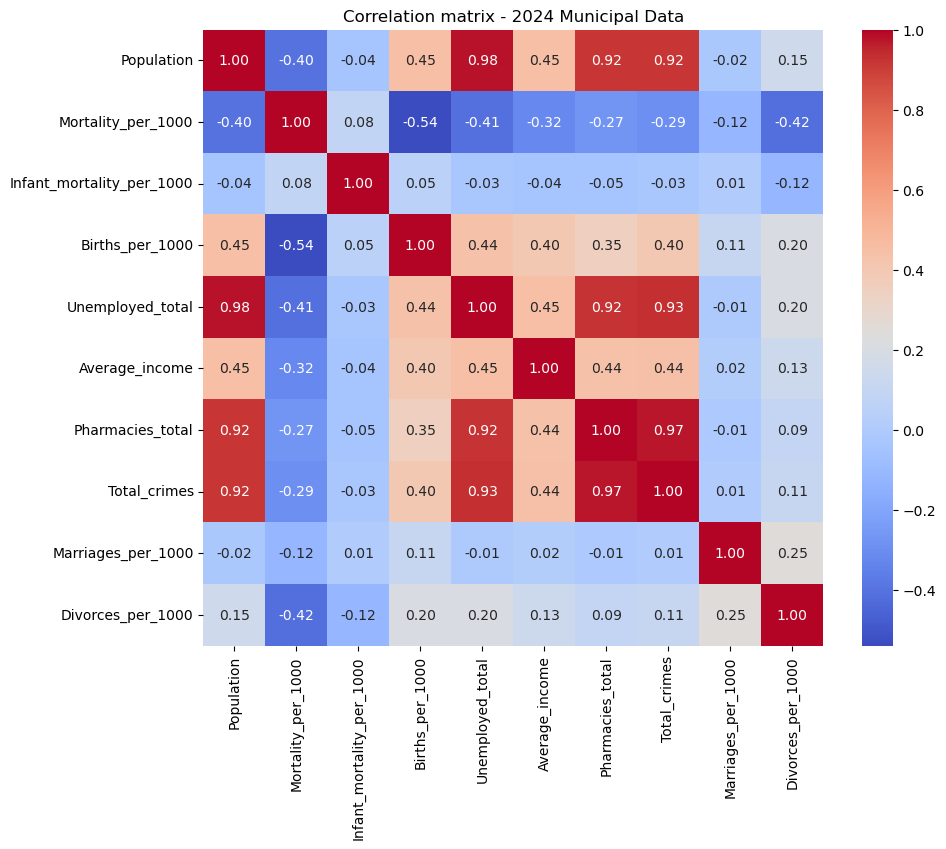

In [9]:
# =========================================
# Correlation analysis (Year 2024)
# =========================================

# Numerical variables of interest
corr_vars = [
    "Population",
    "Mortality_per_1000",
    "Infant_mortality_per_1000",
    "Births_per_1000",
    "Unemployed_total",
    "Average_income",
    "Pharmacies_total",
    "Total_crimes",
    "Marriages_per_1000",
    "Divorces_per_1000"
]

# Correlation matrix
corr = df_2024_simple[corr_vars].corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation matrix - 2024 Municipal Data")
plt.show()